# Biodata
* Nama: **Virgiawan Teguh Kusuma**
* Email: **181240000833@unisnu.ac.id**
* Domisili: **Kabupaten Jepara, Jawa Tengah**

# Domain Proyek
Pada bagian ini, Anda menguraikan secara singkat informasi mengenai pilihan domain yang akan diselesaikan permasalahannya. 
Sebagai contoh, Anda memilih domain telekomunikasi. Anda dapat menguraikan bagian ini dengan pendekatan berikut:
- Sertakan informasi atau latar belakang yang relevan mengenai pemilihan domain ini.
- Jelaskan mengapa dan bagaimana masalah dalam domain yang Anda pilih tersebut harus diselesaikan.
- Sertakan pula hasil riset terkait atau referensi yang relevan. Anda dapat menggunakan [tautan](https://scholar.google.com/) untuk menuliskan referensi atau rujukan.

# Business Understanding
Bagian ini menjelaskan proses klarifikasi masalah dan mengajukan minimal satu solusi untuk menyelesaikan permasalahan. Bagian laporan ini mencakup:

## Problem Statements
Tuliskan problem statement Anda di sini. Anda dapat menggunakan kalimat tanya untuk mendefinisikan bagian ini.

## Goals
Tuliskan dan jelaskan goal proyek yang ingin Anda capai di bagiani ini. Anda dapat menggunakan bullet point jika memiliki lebih dari satu goals proyek.

## Solution statements
Sampaikan solusi yang Anda ajukan untuk menyelesaikan permasalahan di sini. Misalnya, Anda mengajukan dua algoritma machine learning sebagai solusi permasalahan, yaitu Random Forest dan Boosting Algorithm. Jelaskan secara singkat mengenai kedua algoritma ini. 
Sebagai contoh:
- **Random Forest**. Kalimat selanjutnya menjelaskan informasi atau cara kerja algoritma ini. Selain itu, dapat juga Anda tambahkan kelebihan dan kekurangan algoritma ini.
- **Boosting Algorithm**. Sama dengan di atas. 

# Data Understanding
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data).

Selanjutnya, uraikanlah seluruh variabel atau fitur pada data. Sebagai contoh:  

Variabel-variabel pada Restaurant UCI dataset adalah sebagai berikut:
- accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
- cuisine : merupakan jenis masakan yang disajikan pada restoran.
- dst

# Load Library

## Load Google Drives

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Library Lainnya

In [2]:
# Import library
import pandas as pd
import numpy as np 
import zipfile
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

     |████████████████████████████████| 11.8 MB 18.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619426 sha256=5890bdce33f08bf246fffcd2c6ee85099e60042d336333c99012880b1c3a841a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Load Dataset

## Load dataset & Ekstraksi file yang masih berbentuk zip dari GDrive

In [4]:
anime = '/content/drive/MyDrive/anime recommendation.zip'
animeRef = zipfile.ZipFile(anime, 'r')
animeRef.extractall('/content')
animeRef.close()

## Inisialisasi variable untuk membuat Dataframe

In [8]:
anime_df = pd.read_csv('anime_list.csv')
anime_df

,mal_id,title,synopsis,background,aired,airing,duration,episodes,type,favorites,members,rank,popularity,score,scored_by,rating,premiered,genres,related,status,licensors,producers,studios
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",-,"Apr 3, 1998 to Apr 24, 1999",0,24 min per ep,26,TV,59968,1366272,32.0,44,8.77,661519,R - 17+ (violence & profanity),Spring 1998,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Finished Airing,"Funimation, Bandai Entertainment",Bandai Visual,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",-,"Sep 1, 2001",0,1 hr 55 min,1,Movie,1063,291258,163.0,542,8.39,168515,R - 17+ (violence & profanity),-,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",Finished Airing,Sony Pictures Entertainment,"Sunrise, Bandai Visual",Bones
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",-,"Apr 1, 1998 to Sep 30, 1998",0,24 min per ep,26,TV,11882,591134,285.0,213,8.23,288760,PG-13 - Teens 13 or older,Spring 1998,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Finished Airing,"Funimation, Geneon Entertainment USA",Victor Entertainment,Madhouse
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,-,"Jul 2, 2002 to Dec 24, 2002",0,25 min per ep,26,TV,512,97700,2508.0,1535,7.27,37135,PG-13 - Teens 13 or older,Summer 2002,"Action, Mystery, Police, Supernatural, Drama, ...",{},Finished Airing,"Funimation, Bandai Entertainment","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,-,"Sep 30, 2004 to Sep 29, 2005",0,23 min per ep,52,TV,10,13576,3769.0,4514,6.97,5463,PG - Children,Fall 2004,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",Finished Airing,-,"TV Tokyo, Dentsu",Toei Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18157,48952,Twisted Wonderland 1st Anniversary PV,Disney's Twisted Wonderland mobile game had it...,-,"Mar 17, 2021",0,2 min,1,Special,0,36,13287.0,17844,-1.00,-1,PG-13 - Teens 13 or older,-,"['Music', 'Demons']",{},Finished Airing,-,['Aniplex'],-
18158,48953,Natsume Yuujinchou: Hitoyoshi Kuma de no Yasas...,A collaboration with the Kumamoto prefecture i...,-,"Apr 21, 2021",0,2 min,1,ONA,0,147,11663.0,16487,-1.00,-1,G - All Ages,-,['Slice of Life'],"{'Other': [{'mal_id': 4081, 'type': 'anime', '...",Finished Airing,-,-,-
18159,48954,Hairpin Double,-,-,2021 to ?,0,Unknown,-1,TV,0,42,-1.0,18204,-1.00,-1,None,-,"['Action', 'Music', 'Fantasy']",{},Not yet aired,-,-,['Felix Film']
18160,48956,Wu Shang Shen Di 2nd Season,-,-,"May 21, 2021 to ?",1,7 min per ep,64,ONA,2,409,13511.0,13038,-1.00,-1,PG-13 - Teens 13 or older,-,"['Action', 'Adventure', 'Supernatural', 'Magic...","{'Prequel': [{'mal_id': 42187, 'type': 'anime'...",Currently Airing,-,-,-


In [6]:
anime_df = anime_df.drop(columns=['battery',
                                    'price', 
                                    'name',
                                    'memory',
                                    'processor'])

(18162, 23)

In [7]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      18162 non-null  int64  
 1   title       18162 non-null  object 
 2   synopsis    18162 non-null  object 
 3   background  18162 non-null  object 
 4   aired       18162 non-null  object 
 5   airing      18162 non-null  int64  
 6   duration    18162 non-null  object 
 7   episodes    18162 non-null  int64  
 8   type        18162 non-null  object 
 9   favorites   18162 non-null  int64  
 10  members     18162 non-null  int64  
 11  rank        18162 non-null  float64
 12  popularity  18162 non-null  int64  
 13  score       18162 non-null  float64
 14  scored_by   18162 non-null  int64  
 15  rating      18162 non-null  object 
 16  premiered   18162 non-null  object 
 17  genres      18095 non-null  object 
 18  related     18162 non-null  object 
 19  status      18162 non-nul

In [ ]:
print('Jumlah id anime:', len(anime_df['anime_id'].unique()))
print('Jumlah nama anime:', len(anime_df['name'].unique()))

Jumlah id anime: 12294
Jumlah nama anime: 12292


In [ ]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime_df = anime_df.dropna(axis=0)
anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime_df.shape

(12017, 7)

In [ ]:
anime_df['rating'] = anime_df['rating'].astype(int)
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12017 non-null  int64 
 1   name      12017 non-null  object
 2   genre     12017 non-null  object
 3   type      12017 non-null  object
 4   episodes  12017 non-null  object
 5   rating    12017 non-null  int64 
 6   members   12017 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 751.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


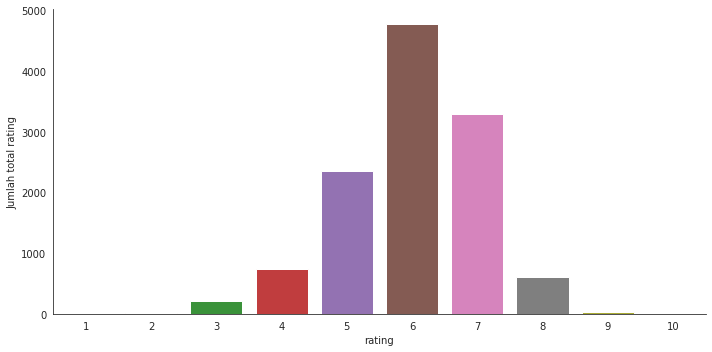

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot("rating", data=anime_df, aspect=2.0, kind='count')
    g.set_ylabels("Jumlah total rating")

In [ ]:
rating_df = pd.read_csv('rating.csv')
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [ ]:
print('Jumlah user:', len(rating_df['user_id'].unique()))
print('Jumlah anime:', len(rating_df['anime_id'].unique()))
print('Jumlah rating:', len(rating_df['rating'].unique()))

Jumlah user: 73515
Jumlah anime: 11200
Jumlah rating: 11


In [ ]:
print('Jumlah total rating < 1 :', rating_df['rating'].lt(1).sum())
rating_df.shape

Jumlah total rating < 1 : 1476496


(7813737, 3)

In [ ]:
rating_df = rating_df[rating_df['rating']>=1]
print('Jumlah total rating < 1 :', rating_df['rating'].lt(1).sum())
rating_df.shape

Jumlah total rating < 1 : 0


(6337241, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


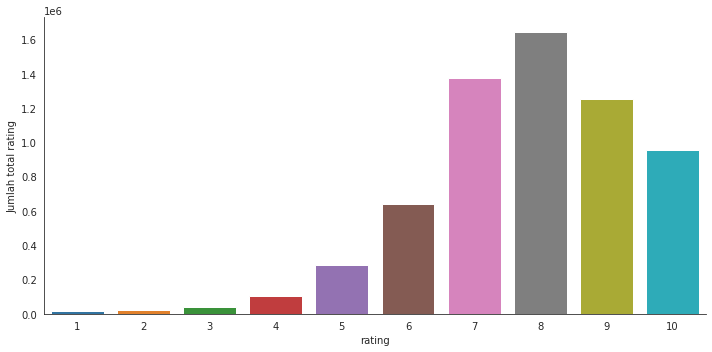

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot("rating", data=rating_df, aspect=2.0, kind='count')
    g.set_ylabels("Jumlah total rating")

# Model Development

## Content-Based Filtering

In [ ]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266


In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tfidf_matrix = tf.fit_transform(anime_df['name']) 
 
tfidf_matrix.shape

(12017, 11952)

In [ ]:
cs = cosine_similarity(tfidf_matrix)
cs

array([[1.        , 0.        , 0.        , ..., 0.034281  , 0.02800732,
        0.03361191],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.034281  , 0.        , 0.        , ..., 1.        , 0.81699263,
        0.02039521],
       [0.02800732, 0.        , 0.        , ..., 0.81699263, 1.        ,
        0.01666274],
       [0.03361191, 0.        , 0.        , ..., 0.02039521, 0.01666274,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim 
# dengan baris dan kolom berupa nama resto
cs_df = pd.DataFrame(cs, index=new_df['title'],
                             columns=new_df['title'])
print('Shape:', cs_df.shape)

# Melihat similarity matrix pada setiap resto
cs_df.sample(10, axis=1).sample(10, axis=0)

Shape: (656, 656)


title,What They Call Him (Skit),You\'re The One,Undo,The Ghost Of You (Album Version),Addams Groove,Halo,Wait & See (Gucci Soundsystem Remix),You\'re The One,Microfoni Assassini (2005 Digital Remaster),A Ti
title,,,,,,,,,,
Fire Bomb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Have Faith In Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ain\'t Misbehavin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Electric Avenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sehr kosmisch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bleed It Out [Live At Milton Keynes],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Own Worst Enemy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def song_recommendations(title, similarity_data=cs_df, 
                         items=new_df[["title","artist"]], k=10):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    book_title : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan 
    # partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar judul buku yang dicari 
    # tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
title = 'Addams Groove'
song_recommendation = song_recommendations(title)
recommendation_listen = pd.merge(song_recommendation, popular_title, on='title')
recommendation_listen

ValueError: ignored